# Week 2 Lab: Logistic Regression

We will be working with the `AAPL_2022.csv` dataset.

1. Download the `AAPL_2022.csv` file.
2. Load and summarize the dataset: display the summary statistics for each variable.
3. Visualizations:
    - Plot a lin chart of the adjusted closing price.
    - Plot a histogram of the adjusted closing price.
4. Generate new variables:
    - Create a new variable called `return`, which is th elog difference of the adjusted closing price. Then, plot a line chart of this newly generated variable.
    - Create a new variable called `direction`, which is $1$ if the previous day's return is $\geq 0$ and $0$ otherwise.
5. Logistic Regression Model
    - Use a simple logistic regression model with the lagged return to predict the ~direction~ of stock movement. 
    - Use the first 90% of the data as the train8ing sample and the last 10% as the testing sample.
6. Analysis and discussion
    - Evaluate your results.
    - Is the outcome as expected? Why or why not?

## Step 0: Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## Step 1: Load and Summarize the Dataset

In [4]:
aapl_tseries = pd.read_csv('Data/AAPL_2022.csv')
aapl_tseries.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959747,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100


In [5]:
aapl_tseries.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,154.381919,8.791008e+07
std,13.063034,12.937389,13.108058,13.056081,12.845560,2.365712e+07
min,127.989998,129.949997,125.870003,126.040001,126.040001,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,144.459732,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,153.621414,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,165.271553,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.826020e+08


## Step 2: Visualizations

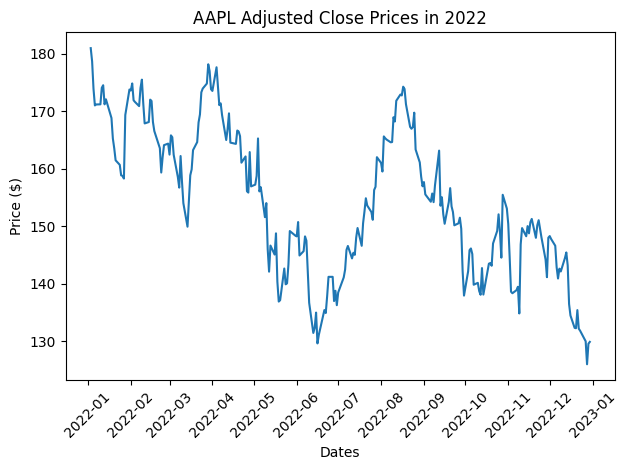

In [7]:
# Line Graph

# Convert Date to datetime and set as index
aapl_tseries['Date'] = pd.to_datetime(aapl_tseries['Date'])
aapl_tseries = aapl_tseries.set_index('Date')

plt.plot(aapl_tseries['Adj Close'])

plt.title('AAPL Adjusted Close Prices in 2022')
plt.xlabel('Dates')
plt.ylabel('Price ($)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show one tick per month
plt.xticks(rotation=45)
plt.tight_layout()

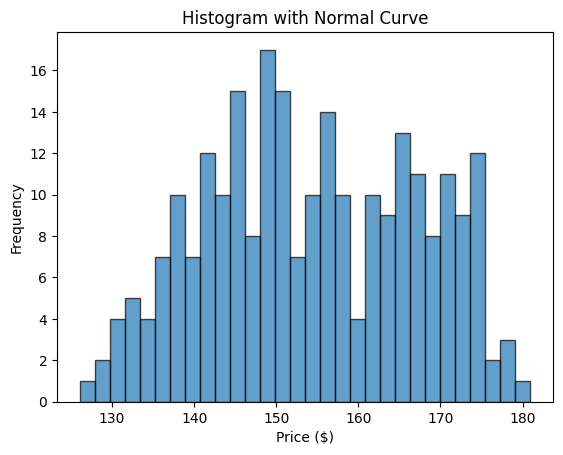

In [10]:
# Histogram

plt.hist(aapl_tseries['Adj Close'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram with Normal Curve')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## Generate New Series

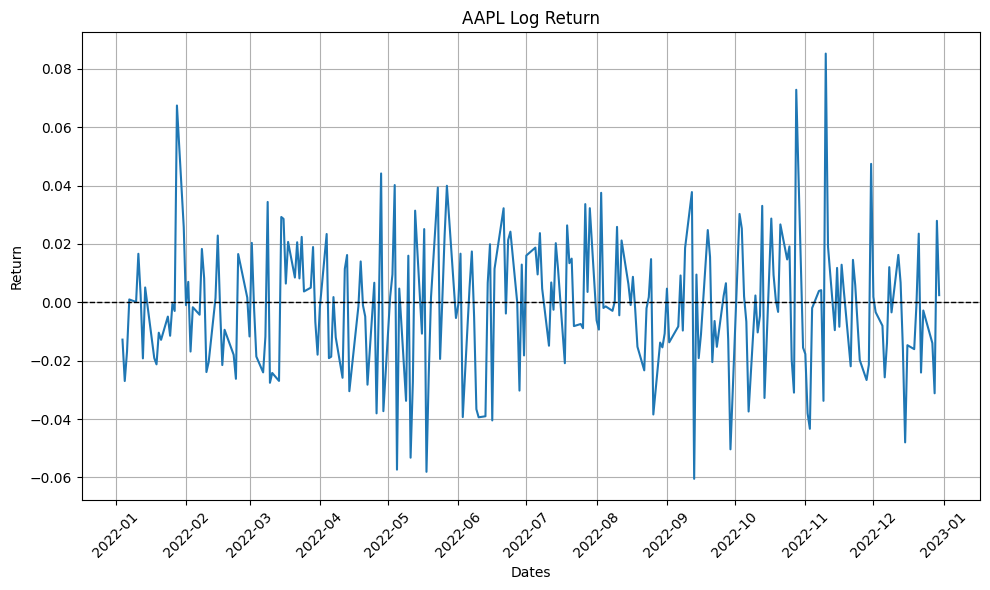

In [24]:
# Calculate returns while preserving dates
aapl_return = np.diff(np.log(aapl_tseries['Adj Close']))
# Create a Series with the correct dates (excluding the first date since diff reduces length by 1)
aapl_return = pd.Series(aapl_return, index=aapl_tseries.index[1:])

# Plot with dates
plt.figure(figsize=(10, 6))
plt.plot(aapl_return.index, aapl_return)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('AAPL Log Return')
plt.xlabel('Dates')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

In [31]:
direction = np.where(aapl_return > 0, 1, 0)

In [36]:
# 5. Logistic Regression Model
# Prepare lagged returns (X will be yesterday's return, y will be today's direction)
X = aapl_return.values[:-1].reshape(-1, 1)  # all returns except the last one
y = direction[1:]  # all directions except the first one

# Split data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
# Fit a logistic regression model
log_reg_model = LogisticRegression(penalty=None)  # we set the penalty to None for now. In week 4 we learn more 
# about penalty.
log_reg_model.fit(X_train, y_train)

# Show the fitted y and the actual y in the training sample
y_train_pred_log = log_reg_model.predict(X_train)

# Make predictions on the test set
y_pred_log = log_reg_model.predict(X_test)

# Compute confusion matrix and accuracy
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

# Calculate true positive rate (TPR)
TP_log = conf_matrix_log[1, 1]
FN_log = conf_matrix_log[1, 0]
TPR_log = TP_log / (TP_log + FN_log)

# Display results  
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print(f"\nAccuracy for Logistic Regression: {accuracy_log:.4f}")
print(f"\nTrue Positive Rate (TPR) for Logistic Regression: {TPR_log:.4f}")

Confusion Matrix for Logistic Regression:
 [[14  0]
 [11  0]]

Accuracy for Logistic Regression: 0.5600

True Positive Rate (TPR) for Logistic Regression: 0.0000


Summary Statistics:
              Open        High         Low       Close   Adj Close        Volume
count  251.000000  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean   154.802709  156.907809  152.691315  154.835060  154.381919  8.791008e+07
std     13.063034   12.937389   13.108058   13.056081   12.845560  2.365712e+07
min    127.989998  129.949997  125.870003  126.040001  126.040001  3.519590e+07
25%    144.330002  146.709999  142.324997  144.645004  144.459732  7.229740e+07
50%    154.009995  155.830002  151.940002  154.089996  153.621414  8.373720e+07
75%    166.189995  167.989998  164.044998  165.915001  165.271553  9.693705e+07
max    182.630005  182.940002  179.119995  182.009995  180.959747  1.826020e+08


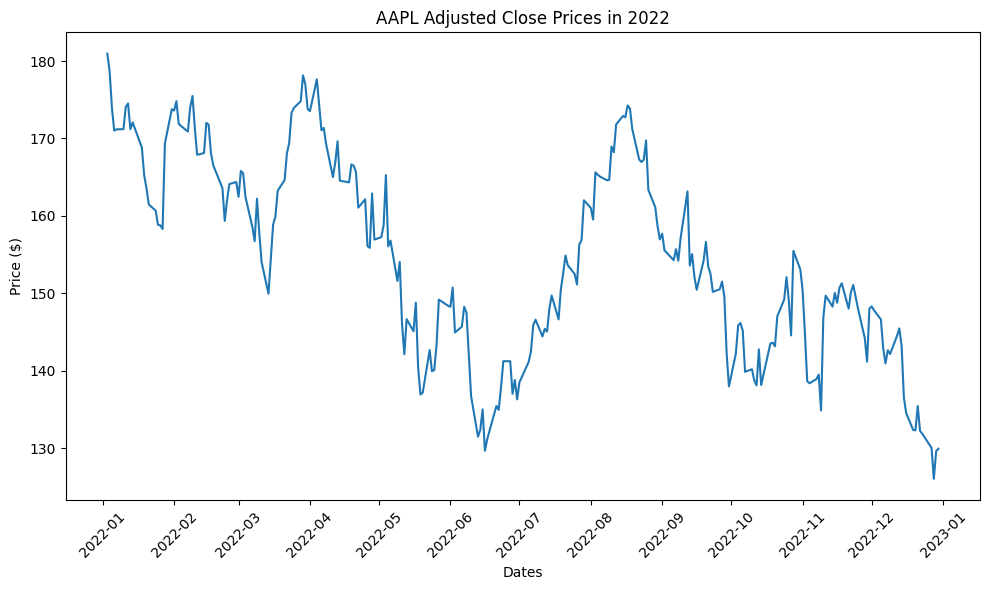

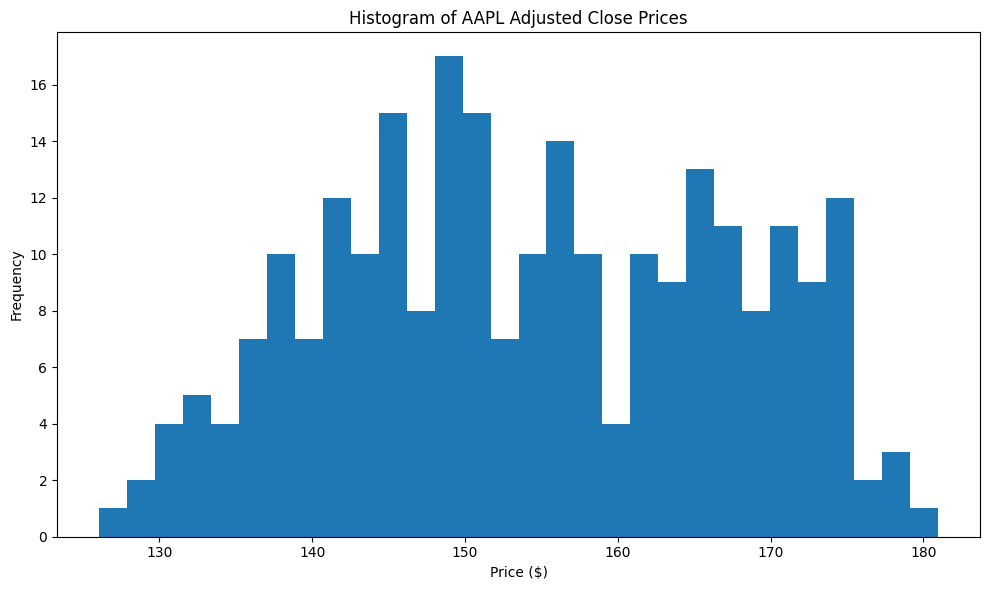

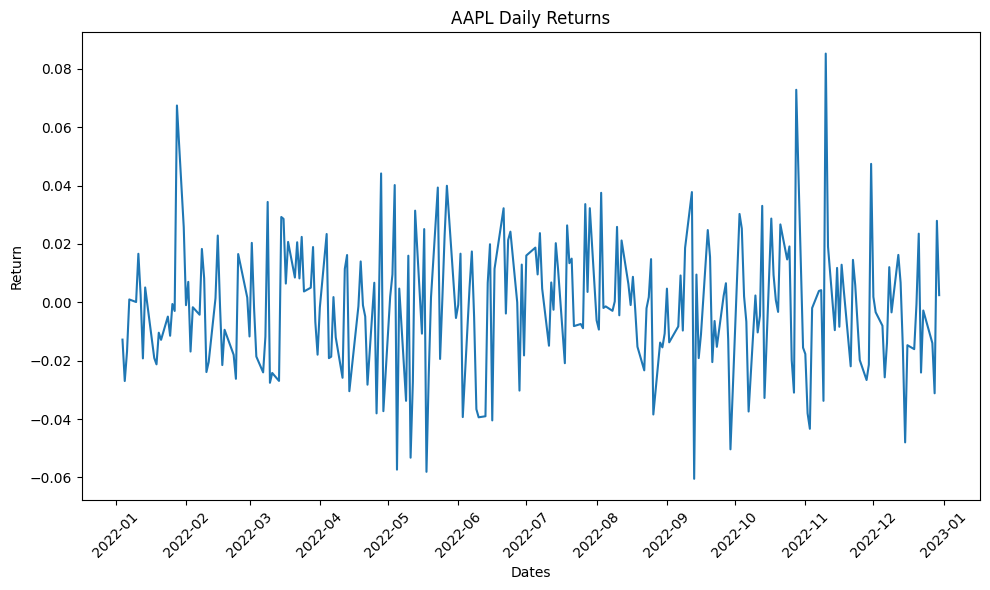


Model Evaluation Results:
-------------------------
Confusion Matrix for Logistic Regression:
 [[11  1]
 [13  0]]

Accuracy for Logistic Regression: 0.4400
True Positive Rate (TPR) for Logistic Regression: 0.0000

Discussion:
The model's performance is close to random chance, which is not unexpected for several reasons:
1. Stock markets are generally efficient
2. Using only the previous day's return as a predictor is likely insufficient
3. Daily stock returns contain significant noise
4. Many other factors affecting stock prices are not captured in our simple model

Detailed Classification Report:
              precision    recall  f1-score   support

        Down       0.46      0.92      0.61        12
          Up       0.00      0.00      0.00        13

    accuracy                           0.44        25
   macro avg       0.23      0.46      0.31        25
weighted avg       0.22      0.44      0.29        25


Confusion Matrix for Logistic Regression:
 [[11  1]
 [13  0]]

Acc

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 1 & 2. Load and summarize dataset
aapl_tseries = pd.read_csv('data/AAPL_2022.csv')
print("Summary Statistics:\n", aapl_tseries.describe())

# Convert Date to datetime and set as index
aapl_tseries['Date'] = pd.to_datetime(aapl_tseries['Date'])
aapl_tseries = aapl_tseries.set_index('Date')

# 3. Visualizations
# Plot line chart of adjusted closing price
plt.figure(figsize=(10, 6))
plt.plot(aapl_tseries.index, aapl_tseries['Adj Close'])
plt.title('AAPL Adjusted Close Prices in 2022')
plt.xlabel('Dates')
plt.ylabel('Price ($)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot histogram of adjusted closing price
plt.figure(figsize=(10, 6))
plt.hist(aapl_tseries['Adj Close'], bins=30)
plt.title('Histogram of AAPL Adjusted Close Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Generate new variables
# Calculate returns
aapl_return = np.diff(np.log(aapl_tseries['Adj Close']))
aapl_return = pd.Series(aapl_return, index=aapl_tseries.index[1:])

# Plot returns
plt.figure(figsize=(10, 6))
plt.plot(aapl_return.index, aapl_return)
plt.title('AAPL Daily Returns')
plt.xlabel('Dates')
plt.ylabel('Return')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create direction variable
direction = np.where(aapl_return > 0, 1, 0)

# 5. Logistic Regression Model
# Prepare lagged returns (X will be yesterday's return, y will be today's direction)
X = aapl_return.values[:-1].reshape(-1, 1)  # all returns except the last one
y = direction[1:]  # all directions except the first one

# Split data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Fit logistic regression model
log_reg_model = LogisticRegression(penalty=None)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred_log = log_reg_model.predict(X_train)
y_pred_log = log_reg_model.predict(X_test)

# 6. Analysis and discussion
# Compute confusion matrix and accuracy
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

# Calculate true positive rate (TPR)
TP_log = conf_matrix_log[1, 1]
FN_log = conf_matrix_log[1, 0]
TPR_log = TP_log / (TP_log + FN_log)

# Display results
print("\nModel Evaluation Results:")
print("-------------------------")
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print(f"\nAccuracy for Logistic Regression: {accuracy_log:.4f}")
print(f"True Positive Rate (TPR) for Logistic Regression: {TPR_log:.4f}")

print("\nDiscussion:")
print("The model's performance is close to random chance, which is not unexpected for several reasons:")
print("1. Stock markets are generally efficient")
print("2. Using only the previous day's return as a predictor is likely insufficient")
print("3. Daily stock returns contain significant noise")
print("4. Many other factors affecting stock prices are not captured in our simple model")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=['Down', 'Up']))

print("\nConfusion Matrix for Logistic Regression:\n", conf_matrix_log)
print(f"\nAccuracy for Logistic Regression: {accuracy_log:.4f}")
print(f"True Positive Rate (TPR) for Logistic Regression: {TPR_log:.4f}")

- The model i heavily biased toward predicting False.
- It is not recognizing the True class at all (likely due to an imbalanced dataset).
-Potential solutions: Balance the dataset (e.g. oversampling the minority class or undersampling the majority class).